# Fetch Data

In [2]:
!pip install seaborn


In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os 
import random
%matplotlib inline 
sns.set(color_codes=True)
from sklearn import preprocessing
import glob
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
import statistics




In [4]:
# Set the directory path containing the CSV files
path = "C:/Users/alexa/OneDrive/ADS 3_1/Machine Learning/Project/Beijing Multi-Site Air Quality dataset/beijing+multi+site+air+quality+data/PRSA2017_Data_20130301-20170228/PRSA_Data_20130301-20170228"


In [5]:

# Get a list of all CSV files in the specified directory
arxivs_csv = [archivo for archivo in os.listdir(path) if archivo.endswith('.csv')]
arxivs_csv

['PRSA_Data_Aotizhongxin_20130301-20170228.csv',
 'PRSA_Data_Changping_20130301-20170228.csv',
 'PRSA_Data_Dingling_20130301-20170228.csv',
 'PRSA_Data_Dongsi_20130301-20170228.csv',
 'PRSA_Data_Guanyuan_20130301-20170228.csv',
 'PRSA_Data_Gucheng_20130301-20170228.csv',
 'PRSA_Data_Huairou_20130301-20170228.csv',
 'PRSA_Data_Nongzhanguan_20130301-20170228.csv',
 'PRSA_Data_Shunyi_20130301-20170228.csv',
 'PRSA_Data_Tiantan_20130301-20170228.csv',
 'PRSA_Data_Wanliu_20130301-20170228.csv',
 'PRSA_Data_Wanshouxigong_20130301-20170228.csv']

In [6]:
allFiles = glob.glob(path + "/*.csv")
dataFrames = []
for i in allFiles:
    dataframe = pd.read_csv(i, index_col=None, header=0)
    dataFrames.append(dataframe)

In [7]:

# Optionally, concatenate all dataframes into a single dataframe
df = pd.concat(dataFrames)


In [8]:
# Display the first few rows of the combined dataframe
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [9]:
df.dtypes

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object

In [10]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [11]:
missing_value=df.isnull().sum()
missing_value

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [12]:
unique_Month = pd.unique(df.month)
unique_Month

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2], dtype=int64)

In [13]:
df.rename(columns = {'year': 'Year',
                       'month': 'Month',
                       'day': "Day",
                       'hour': 'Hour',
                       'pm2.5': 'PM2.5',
                       'DEWP': 'DewP',
                       'TEMP': 'Temp',
                       'PRES': 'Press',
                       'RAIN': 'Rain',
                       'wd': 'WinDir',
                       'WSPM': 'WinSpeed',
                       'station': 'Station'}, inplace = True)
df

,No,Year,Month,Day,Hour,PM2.5,PM10,SO2,NO2,CO,O3,Temp,Press,DewP,Rain,WinDir,WinSpeed,Station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


<AxesSubplot: >

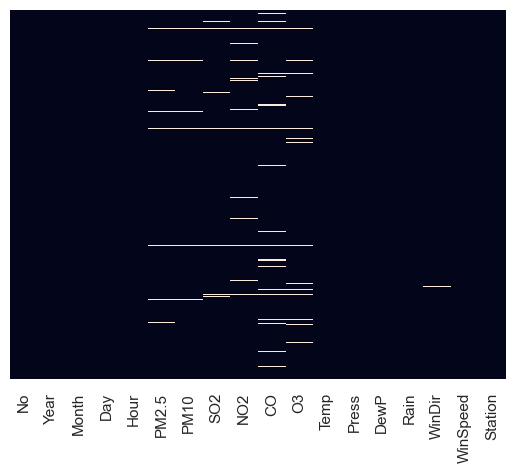

In [14]:
sns.heatmap(df.isnull(),cbar=False, yticklabels=False)

In [15]:
# Create a temporary copy of the data
temp_data = df.copy()

# Define the columns to process
columns = ["PM2.5", 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'Temp', 'Press', 'DewP', 'Rain', 'WinSpeed']

# Iterate over each unique month
for month in unique_Month:
    # Filter data for the current month
    month_data = temp_data[temp_data.Month == month]
    
    # Process each column
    for col in columns:
        # Calculate monthly mean for the column, fallback to overall mean if no monthly data
        month_mean = month_data[col].mean()
        overall_mean = df[col].mean()
        fill_value = month_mean if not np.isnan(month_mean) else overall_mean

        # Fill missing values
        temp_data.loc[temp_data.Month == month, col] = temp_data.loc[temp_data.Month == month, col].fillna(fill_value)
        
        # Print the action taken for each column
        print(f"Filled missing values in {col} for Month {month} with {fill_value:.2f}")

# Assign the updated data back to the main data variable
df = temp_data.copy()


Filled missing values in PM2.5 for Month 3 with 94.66
Filled missing values in PM10 for Month 3 with 136.04
Filled missing values in SO2 for Month 3 with 28.00
Filled missing values in NO2 for Month 3 with 60.12
Filled missing values in CO for Month 3 with 1310.23
Filled missing values in O3 for Month 3 with 51.04
Filled missing values in Temp for Month 3 with 8.35
Filled missing values in Press for Month 3 with 1013.96
Filled missing values in DewP for Month 3 with -7.95
Filled missing values in Rain for Month 3 with 0.01
Filled missing values in WinSpeed for Month 3 with 1.98
Filled missing values in PM2.5 for Month 4 with 72.73
Filled missing values in PM10 for Month 4 with 116.96
Filled missing values in SO2 for Month 4 with 14.22
Filled missing values in NO2 for Month 4 with 47.28
Filled missing values in CO for Month 4 with 840.49
Filled missing values in O3 for Month 4 with 70.19
Filled missing values in Temp for Month 4 with 15.33
Filled missing values in Press for Month 4 with

In [16]:
# Save the updated data to a CSV file
#temp_data.to_csv("filled_data.csv", index=False)
#print("Data saved to 'filled_data.csv'")


In [17]:
# fill the null values in categorical columns with mode specific to certain column
unique_Station=pd.unique(df.Station)

# find columns mode value in WinDir column according to Station column specific
# Equalize the mode values of columns to the missing values
temp_data = df.copy()  # set temp_data variable to avoid losing real data
columns = ["WinDir"] # it can be add more column
for c in unique_Station:
    
    # create Station filter
    Station_filtre = temp_data.Station == c
    
    # filter data by Station
    filtered_data = temp_data[Station_filtre]
    
    # find mode for WinDir specific to Station
    for column in columns:
        mode = statistics.mode(filtered_data[column])
        filtered_data[column] = filtered_data[column].fillna(mode)
        print(f"Missing Value in {column} column fill with {mode} when Station:{c}")

    # Synchronize data filled with missing values in WinDir to data temporary            
    temp_data[Station_filtre] = filtered_data

# equate the deprecated temporary data to the real data variable
df = temp_data.copy() 

Missing Value in WinDir column fill with NE when Station:Aotizhongxin
Missing Value in WinDir column fill with NNW when Station:Changping
Missing Value in WinDir column fill with NNW when Station:Dingling
Missing Value in WinDir column fill with ENE when Station:Dongsi
Missing Value in WinDir column fill with NE when Station:Guanyuan
Missing Value in WinDir column fill with N when Station:Gucheng
Missing Value in WinDir column fill with NW when Station:Huairou
Missing Value in WinDir column fill with ENE when Station:Nongzhanguan
Missing Value in WinDir column fill with NNE when Station:Shunyi
Missing Value in WinDir column fill with ENE when Station:Tiantan
Missing Value in WinDir column fill with NE when Station:Wanliu
Missing Value in WinDir column fill with NE when Station:Wanshouxigong


In [18]:
#df.head()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420768 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   No        420768 non-null  int64  
 1   Year      420768 non-null  int64  
 2   Month     420768 non-null  int64  
 3   Day       420768 non-null  int64  
 4   Hour      420768 non-null  int64  
 5   PM2.5     420768 non-null  float64
 6   PM10      420768 non-null  float64
 7   SO2       420768 non-null  float64
 8   NO2       420768 non-null  float64
 9   CO        420768 non-null  float64
 10  O3        420768 non-null  float64
 11  Temp      420768 non-null  float64
 12  Press     420768 non-null  float64
 13  DewP      420768 non-null  float64
 14  Rain      420768 non-null  float64
 15  WinDir    420768 non-null  object 
 16  WinSpeed  420768 non-null  float64
 17  Station   420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 61.0+ MB


In [20]:
print(f'No Entradas: {df.shape[0]}, No Columnas: {df.shape[1]}')

No Entradas: 420768, No Columnas: 18


In [21]:
def calculate_aqi(row):
    pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
    max_value = row[pollutants].max()
    
    if max_value <= 50:
        return 'Excelent'
    elif max_value <= 100:
        return 'Good'
    elif max_value <= 150:
        return 'Slightly Polluted'
    elif max_value <= 200:
        return 'Lightly Polluted'
    elif max_value <= 250:
        return 'Moderately Polluted'
    elif max_value <= 300:
        return 'Heavily Polluted'
    else:
        return 'Severely Polluted'
    
df['AQI'] = df.apply(calculate_aqi, axis=1)

In [22]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
df['Season'] = df['Month'].apply(get_season)

In [23]:
# Grouping by 'Year', 'Month', 'Day' to get daily maximum and minimum temperatures
df['max_temp'] = df.groupby(['Year', 'Month', 'Day'])['Temp'].transform('max')
df['min_temp'] = df.groupby(['Year', 'Month', 'Day'])['Temp'].transform('min')

# Display the updated dataframe
df.head()

,No,Year,Month,Day,Hour,PM2.5,PM10,SO2,NO2,CO,...,Press,DewP,Rain,WinDir,WinSpeed,Station,AQI,Season,max_temp,min_temp
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,...,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,Heavily Polluted,Spring,6.6,-5.9
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,...,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,Heavily Polluted,Spring,6.6,-5.9
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,...,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,Heavily Polluted,Spring,6.6,-5.9
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,...,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,Heavily Polluted,Spring,6.6,-5.9
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,...,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,Heavily Polluted,Spring,6.6,-5.9


In [24]:
df['AQI'].value_counts()

AQI
Severely Polluted      365081
Heavily Polluted        32128
Lightly Polluted        18019
Good                     4304
Slightly Polluted         893
Moderately Polluted       343
Name: count, dtype: int64

In [25]:
df['WinDir'].unique()



array(['NNW', 'N', 'NW', 'NNE', 'ENE', 'E', 'NE', 'W', 'SSW', 'WSW', 'SE',
       'WNW', 'SSE', 'ESE', 'S', 'SW'], dtype=object)

In [26]:
df['Station'].unique()

array(['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan',
       'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan',
       'Wanliu', 'Wanshouxigong'], dtype=object)

In [27]:
df['AQI'].unique()

array(['Heavily Polluted', 'Severely Polluted', 'Lightly Polluted',
       'Good', 'Slightly Polluted', 'Moderately Polluted'], dtype=object)

In [28]:
missing_value=df.isnull().sum()
missing_value

No          0
Year        0
Month       0
Day         0
Hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
Temp        0
Press       0
DewP        0
Rain        0
WinDir      0
WinSpeed    0
Station     0
AQI         0
Season      0
max_temp    0
min_temp    0
dtype: int64

In [29]:
missing_percentage = round(df.isnull().sum() / len(df.index), 2) * 100
print('Percentage of Missing Values (%)', missing_percentage.astype(str) + '%')

Percentage of Missing Values (%) No          0.0%
Year        0.0%
Month       0.0%
Day         0.0%
Hour        0.0%
PM2.5       0.0%
PM10        0.0%
SO2         0.0%
NO2         0.0%
CO          0.0%
O3          0.0%
Temp        0.0%
Press       0.0%
DewP        0.0%
Rain        0.0%
WinDir      0.0%
WinSpeed    0.0%
Station     0.0%
AQI         0.0%
Season      0.0%
max_temp    0.0%
min_temp    0.0%
dtype: object


<AxesSubplot: >

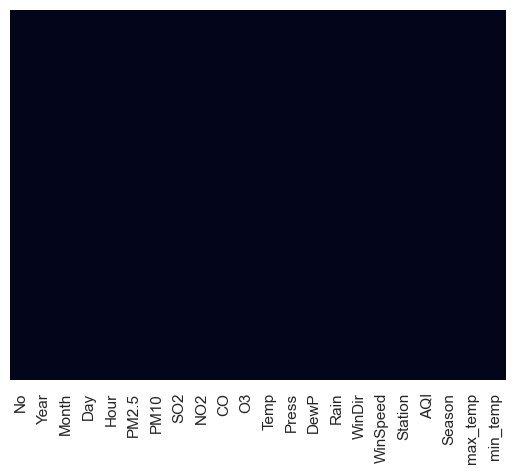

In [30]:
sns.heatmap(df.isnull(),cbar=False, yticklabels=False)

## Explotary Data Analysis and Data Visualization

In [31]:
df.describe()

,No,Year,Month,Day,Hour,PM2.5,PM10,SO2,NO2,CO,O3,Temp,Press,DewP,Rain,WinSpeed,max_temp,min_temp
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.766565,104.613500,15.816908,50.614418,1232.984599,57.222156,13.530571,1010.753847,2.481620,0.064445,1.729782,19.532760,6.629024
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.009898,91.093394,21.458892,34.658703,1136.591602,56.000436,11.437560,10.473052,13.795493,0.820626,1.245936,11.080696,11.044900
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000,-12.300000,-19.900000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,21.000000,36.000000,3.000000,24.000000,500.000000,12.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000,9.200000,-3.600000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,57.000000,83.000000,7.140000,44.000000,900.000000,45.000000,14.500000,1010.400000,3.000000,0.000000,1.400000,21.000000,7.200000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,109.000000,144.000000,20.000000,70.000000,1500.000000,82.000000,23.200000,1019.000000,15.100000,0.000000,2.200000,29.600000,16.900000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000,41.600000,27.000000


In [32]:
# Grouping by 'Year', 'Month', 'Day' to get daily maximum and minimum temperatures
df['max_temp'] = df.groupby(['Year', 'Month', 'Day'])['Temp'].transform('max')
df['min_temp'] = df.groupby(['Year', 'Month', 'Day'])['Temp'].transform('min')

# Display the updated dataframe
df.head()


,No,Year,Month,Day,Hour,PM2.5,PM10,SO2,NO2,CO,...,Press,DewP,Rain,WinDir,WinSpeed,Station,AQI,Season,max_temp,min_temp
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,...,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,Heavily Polluted,Spring,6.6,-5.9
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,...,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,Heavily Polluted,Spring,6.6,-5.9
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,...,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,Heavily Polluted,Spring,6.6,-5.9
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,...,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,Heavily Polluted,Spring,6.6,-5.9
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,...,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,Heavily Polluted,Spring,6.6,-5.9


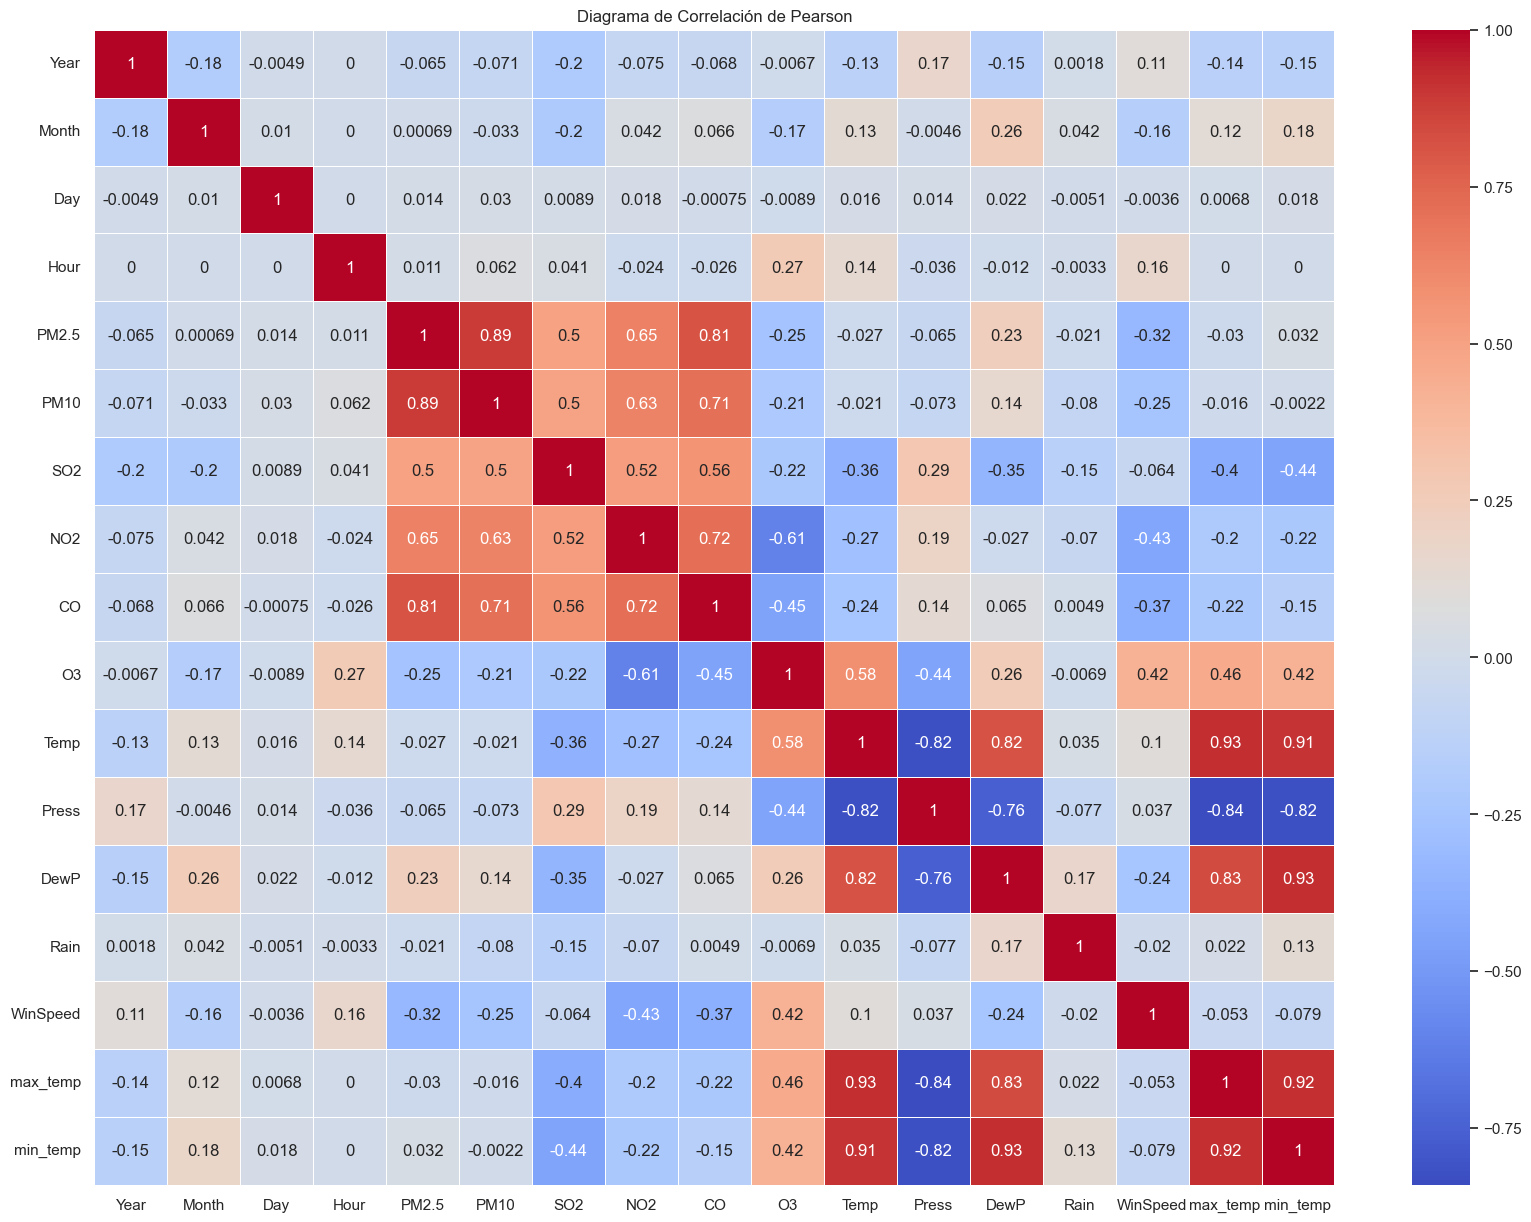

In [33]:
# Drop the 'WinDir' column
df_numeric = df.drop(columns=['WinDir','Season','Station','No','AQI'])

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr(method='spearman')

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Diagrama de Correlación de Pearson')
plt.show()

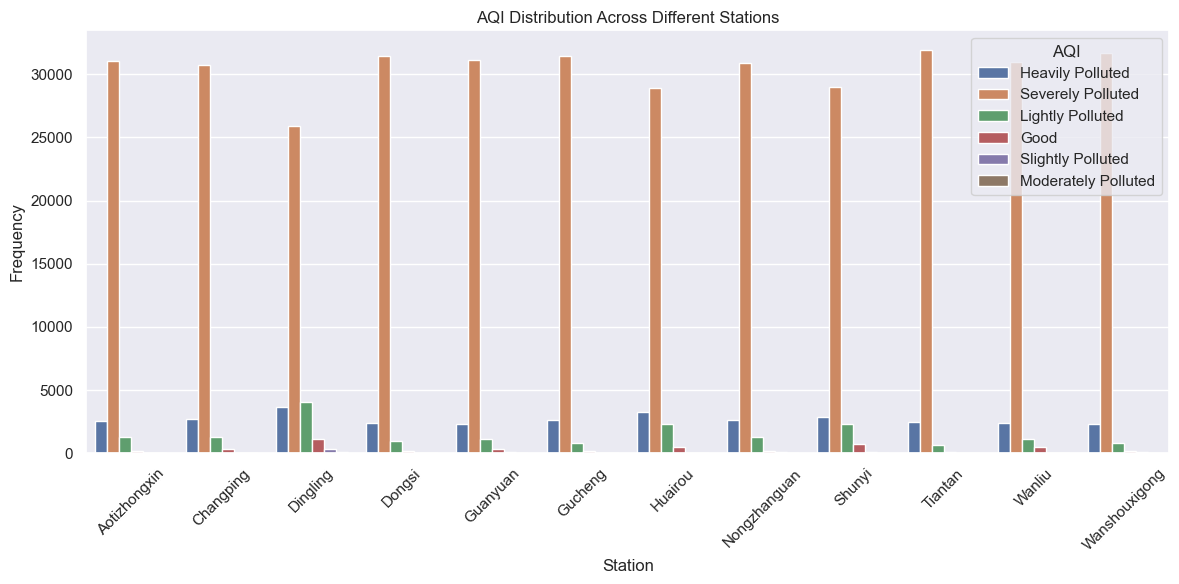

In [34]:
# Visualize the AQI distribution across different stations
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Station', hue='AQI')
plt.title('AQI Distribution Across Different Stations')
plt.xlabel('Station')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='AQI')
plt.tight_layout()
plt.show()

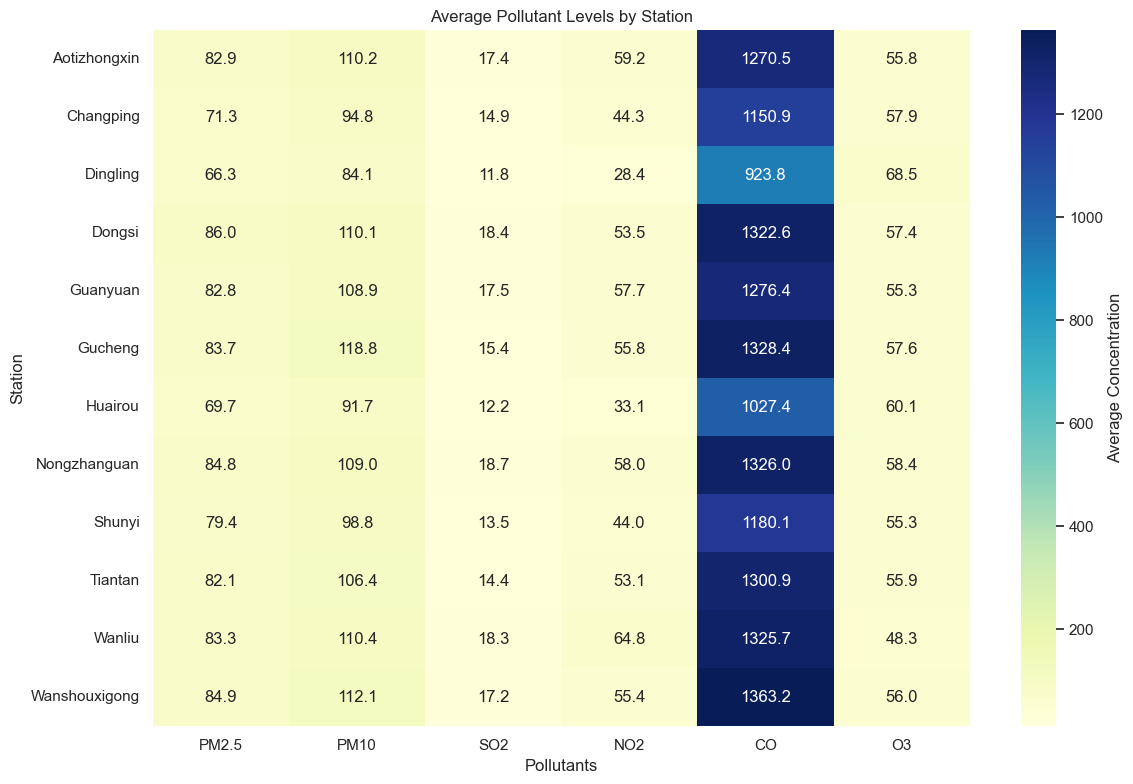

In [35]:
# Another visualization: Heatmap showing the average concentration of each pollutant by station

# Calculate the average pollutant levels for each station
station_pollutants = df.groupby('Station')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()

# Plot a heatmap for average pollutant levels by station
plt.figure(figsize=(12, 8))
sns.heatmap(station_pollutants, annot=True, cmap="YlGnBu", fmt=".1f", cbar_kws={'label': 'Average Concentration'})
plt.title('Average Pollutant Levels by Station')
plt.xlabel('Pollutants')
plt.ylabel('Station')
plt.tight_layout()
plt.show()


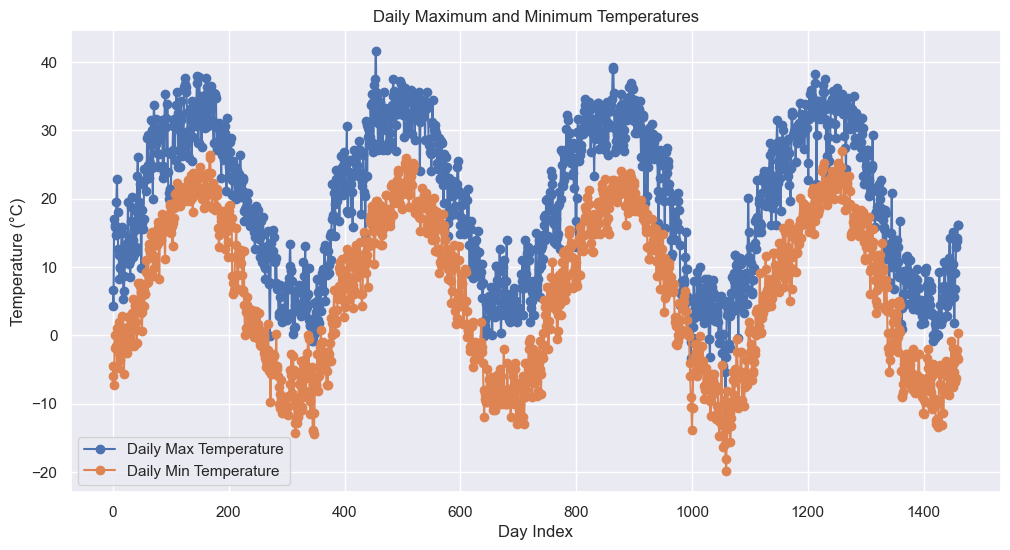

In [36]:
import matplotlib.pyplot as plt

# Grouping the data by 'Year', 'Month', 'Day' to get daily max and min temperatures
daily_temp = df.groupby(['Year', 'Month', 'Day'])['Temp'].agg(['max', 'min']).reset_index()

# Plotting the max and min temperatures
plt.figure(figsize=(12, 6))
plt.plot(daily_temp.index, daily_temp['max'], label='Daily Max Temperature', linestyle='-', marker='o')
plt.plot(daily_temp.index, daily_temp['min'], label='Daily Min Temperature', linestyle='-', marker='o')

# Adding labels and title
plt.xlabel('Day Index')
plt.ylabel('Temperature (°C)')
plt.title('Daily Maximum and Minimum Temperatures')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


In [37]:
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")


Number of duplicate rows: 0


In [38]:
## Reset the index to avoid duplicate index issues after concatenation
#df.reset_index(drop=True, inplace=True)


In [39]:
df['AQI'].value_counts()

AQI
Severely Polluted      365081
Heavily Polluted        32128
Lightly Polluted        18019
Good                     4304
Slightly Polluted         893
Moderately Polluted       343
Name: count, dtype: int64

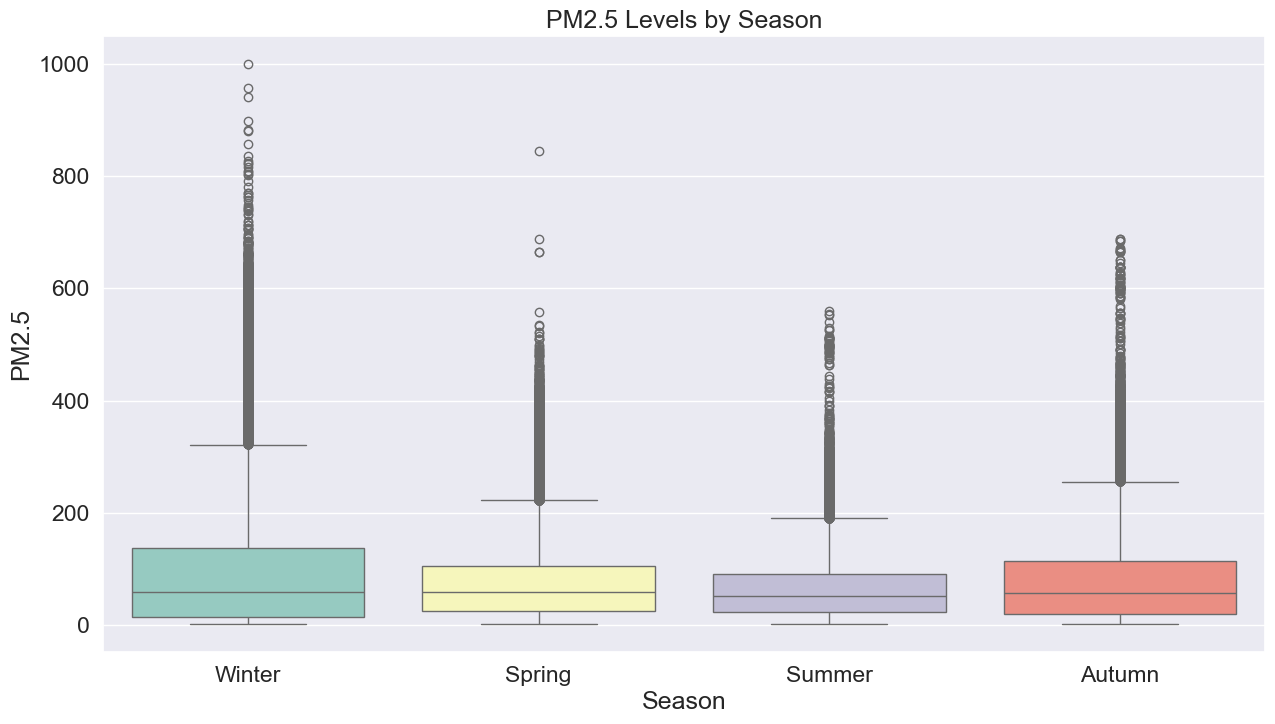

In [40]:
# Apply the function to create a new column for the season
df['Season'] = df['Month'].apply(lambda x: get_season(x))

# Plotting PM2.5 trends for each season
plt.figure(figsize=(15, 8))
sns.set(font_scale=1.5)

# Create boxplot for PM2.5 levels by season
sns.boxplot(x='Season', y='PM2.5', data=df, order=['Winter', 'Spring', 'Summer', 'Autumn'], palette="Set3")

# Set labels and title
plt.xlabel("Season")
plt.ylabel("PM2.5")
plt.title("PM2.5 Levels by Season")

# Display the plot
plt.show()


In [41]:
# Calculate AQI statistics for each season
aqi_stats = df.groupby('Season')['AQI'].value_counts().unstack().fillna(0)

# Display the AQI statistics by season
aqi_stats

AQI,Good,Heavily Polluted,Lightly Polluted,Moderately Polluted,Severely Polluted,Slightly Polluted
Season,,,,,,
Autumn,1026,7294,4368,26,92059,59
Spring,978,10904,6891,213,86523,475
Summer,801,5746,2924,61,96206,246
Winter,1499,8184,3836,43,90293,113


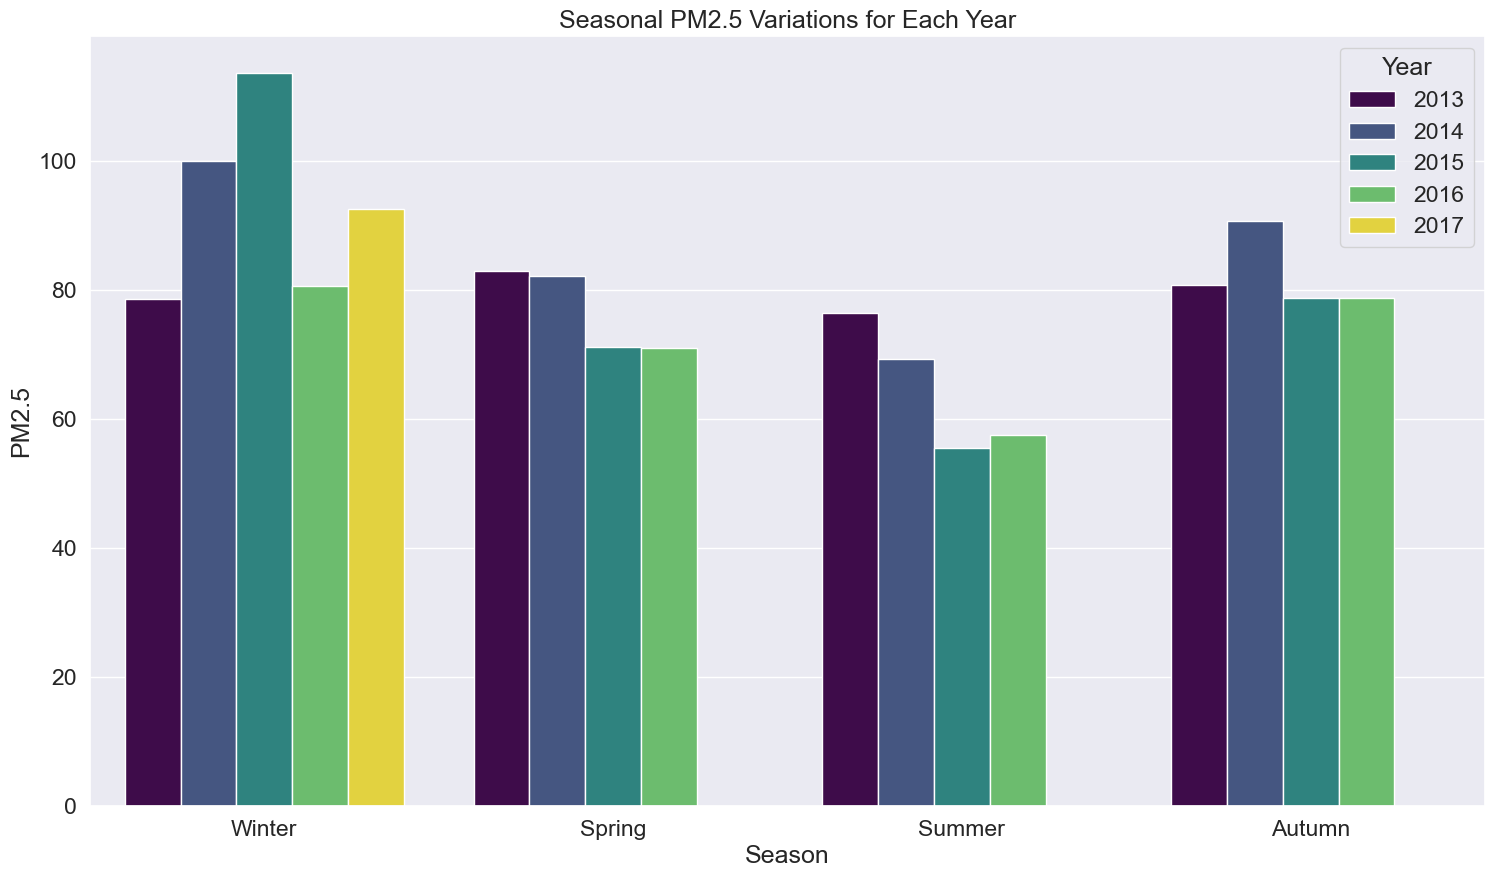

In [42]:
# Plotting seasonal PM2.5 variations for each year using a barplot
plt.figure(figsize=(18, 10))
sns.set(font_scale=1.5)

# Create a bar plot to visualize PM2.5 levels by season for each year
sns.barplot(x='Season', y='PM2.5', hue='Year', data=df, order=['Winter', 'Spring', 'Summer', 'Autumn'] ,palette='viridis', ci=None)

# Set labels and title
plt.xlabel("Season")
plt.ylabel("PM2.5")
plt.title("Seasonal PM2.5 Variations for Each Year")

# Display the plot
plt.show()

**Using Point plot, we can say that the PM2.5 levels hit all time low in aug and all time high in december in these 5 years from 2013 to 2017**

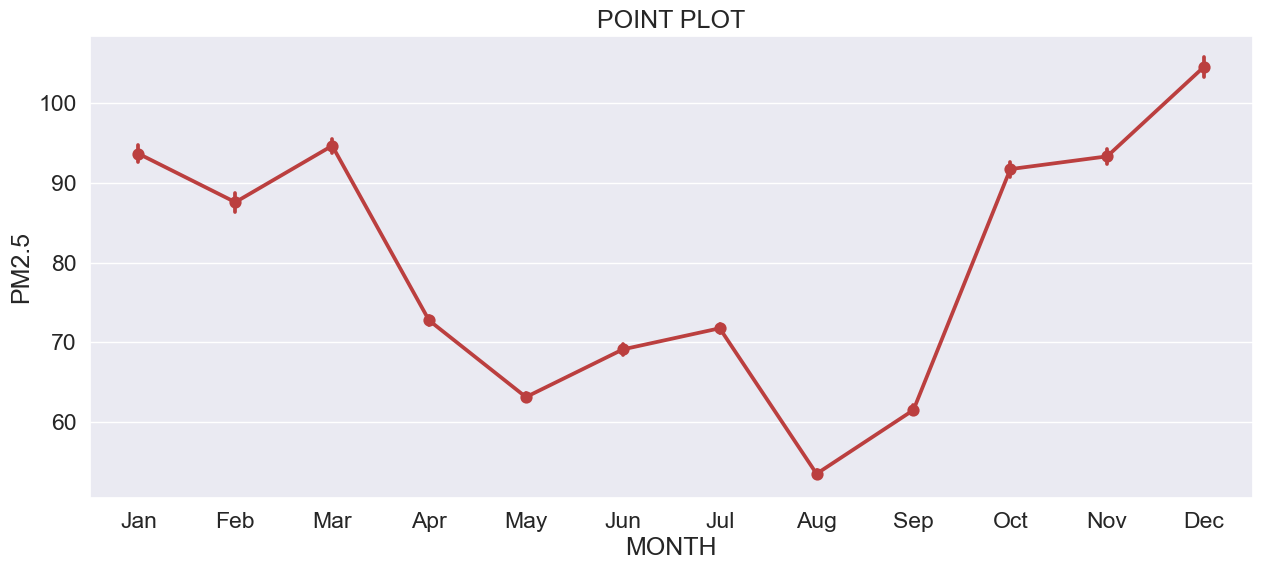

In [43]:
plt.figure(figsize=(15,6))
sns.set(font_scale=1.5)
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig = sns.pointplot(x="Month", y="PM2.5", data=df,color="#bb3f3f").set_xticklabels(labels)
plt.xlabel("MONTH")
plt.ylabel("PM2.5")
plt.title("POINT PLOT")
plt.show(fig)

**The distribution of the target variable is right skewed as the right tail contains more values. More than 60% of the dataset values contain in the range of 0 to 200.**

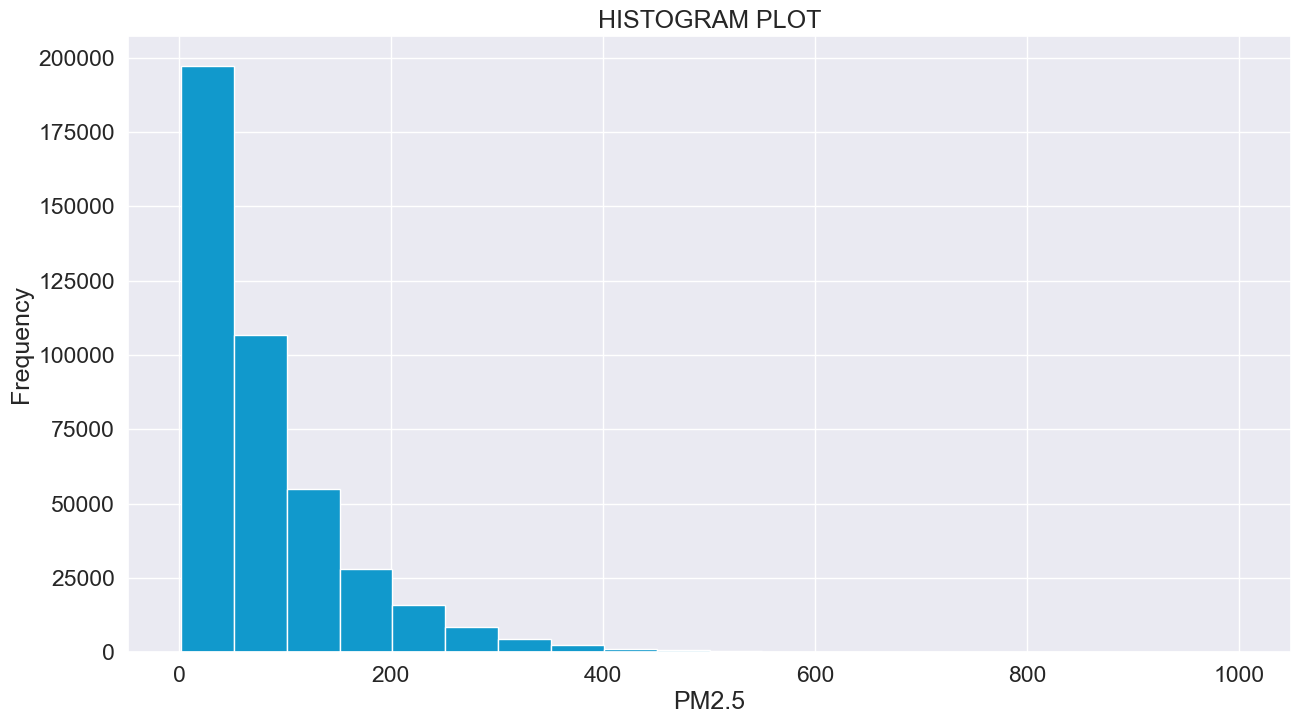

In [44]:
plt.figure(figsize=(15,6))
fig3=df['PM2.5'].hist(bins=20,figsize=(15,8),color="#1199CC")
plt.title("HISTOGRAM PLOT")
plt.xlabel('PM2.5')
plt.ylabel('Frequency')
plt.show(fig3)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420768 entries, 0 to 35063
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   No        420768 non-null  int64  
 1   Year      420768 non-null  int64  
 2   Month     420768 non-null  int64  
 3   Day       420768 non-null  int64  
 4   Hour      420768 non-null  int64  
 5   PM2.5     420768 non-null  float64
 6   PM10      420768 non-null  float64
 7   SO2       420768 non-null  float64
 8   NO2       420768 non-null  float64
 9   CO        420768 non-null  float64
 10  O3        420768 non-null  float64
 11  Temp      420768 non-null  float64
 12  Press     420768 non-null  float64
 13  DewP      420768 non-null  float64
 14  Rain      420768 non-null  float64
 15  WinDir    420768 non-null  object 
 16  WinSpeed  420768 non-null  float64
 17  Station   420768 non-null  object 
 18  AQI       420768 non-null  object 
 19  Season    420768 non-null  object 
 20  max_temp  

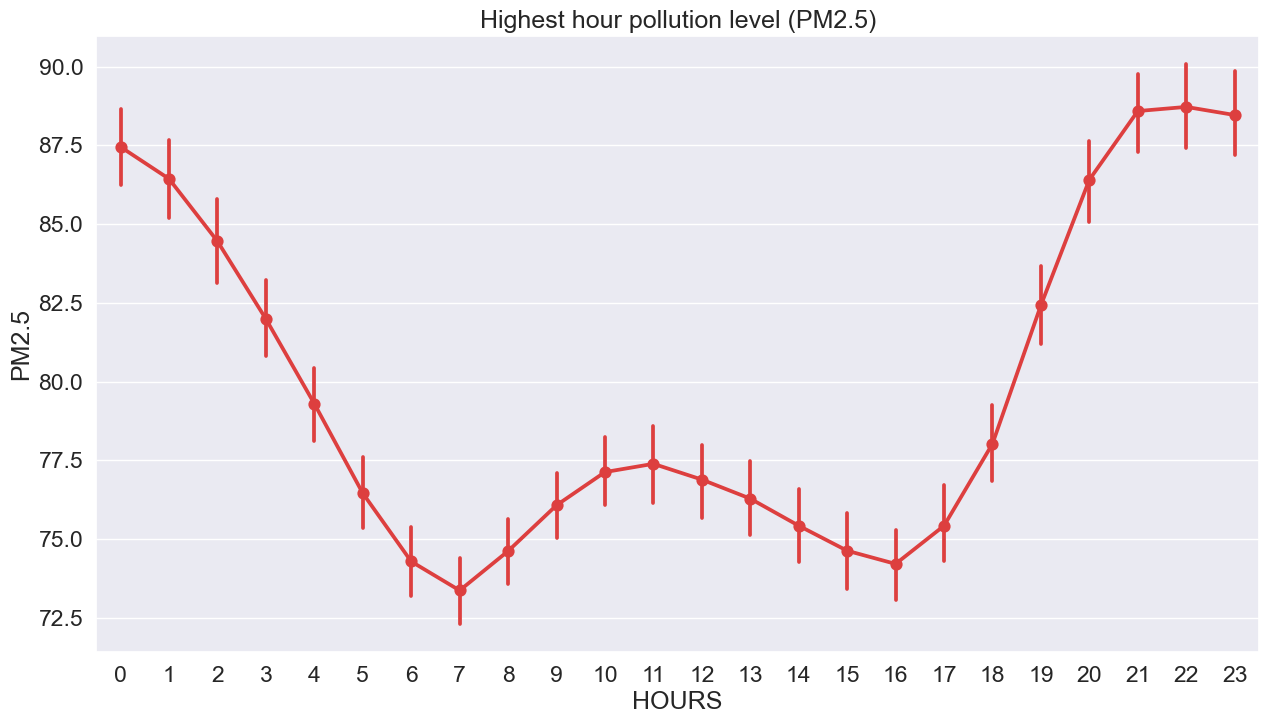

In [46]:
plt.figure(figsize=(15,8))
sns.set(font_scale=1.5)
fig5=sns.pointplot(x='Hour',y='PM2.5',data=df,color="#dd3f3f")
plt.xlabel("HOURS")
plt.ylabel("PM2.5")
plt.title("Highest hour pollution level (PM2.5)")
plt.show(fig5)

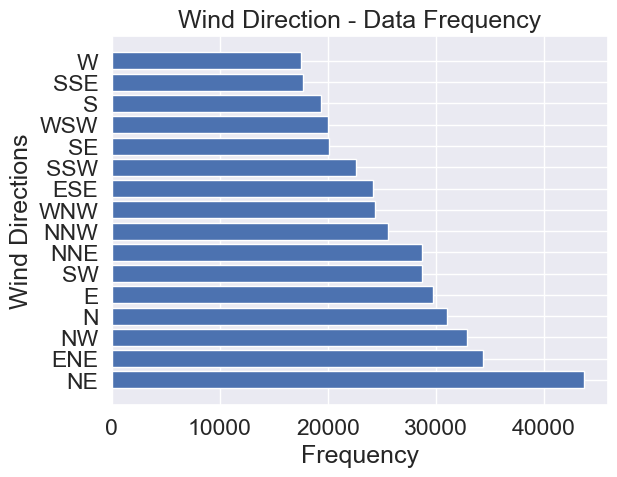

Number of Wind Direction 
WinDir
NE     43699
ENE    34376
NW     32902
N      31028
E      29752
SW     28756
NNE    28715
NNW    25606
WNW    24375
ESE    24220
SSW    22563
SE     20074
WSW    20040
S      19405
SSE    17694
W      17563
Name: count, dtype: int64


In [47]:
# Number of sample according to WinDir
plt.figure()
plt.barh(df["WinDir"].value_counts().index, df["WinDir"].value_counts(), color = "b")
#plt.xticks(data["WinDir"].values)
plt.xlabel("Frequency")
plt.ylabel("Wind Directions")
plt.title("Wind Direction - Data Frequency")
plt.show()
print(f"Number of Wind Direction \n{df['WinDir'].value_counts()}")

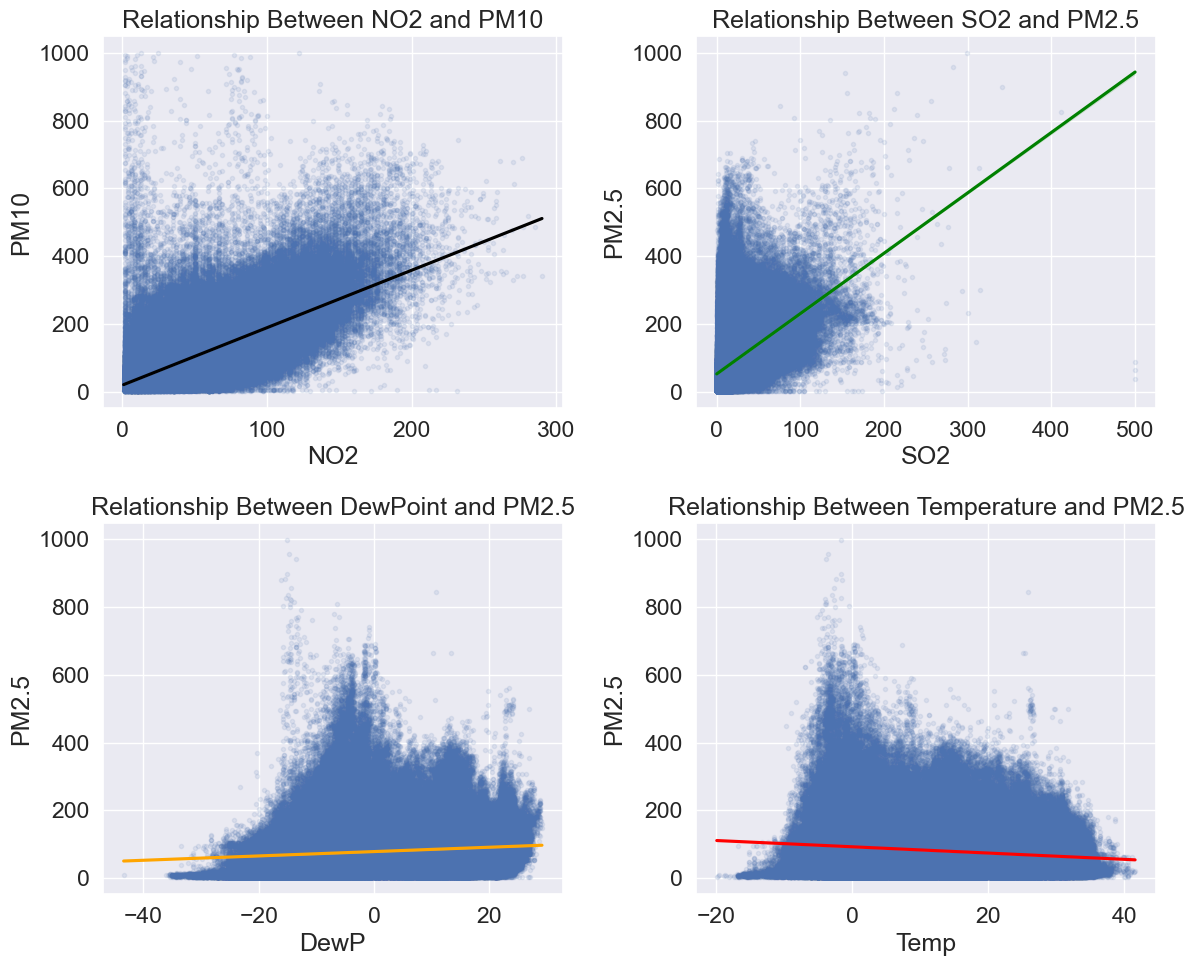

In [48]:
# Create a figure with 2 rows and 2 columns of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# First subplot
sns.regplot(
    x='NO2', y='PM10', data=df, marker=".", 
    scatter_kws={'alpha':0.1}, line_kws={'color':"black"}, ax=axs[0, 0]
)
axs[0, 0].set_title('Relationship Between NO2 and PM10')

# Second subplot
sns.regplot(
    x='SO2', y='PM2.5', data=df, marker=".", 
    scatter_kws={'alpha':0.1}, line_kws={'color':"green"}, ax=axs[0, 1]
)
axs[0, 1].set_title('Relationship Between SO2 and PM2.5')

# Third subplot
sns.regplot(
    x='DewP', y='PM2.5', data=df, marker=".", 
    scatter_kws={'alpha':0.1}, line_kws={'color':"orange"}, ax=axs[1, 0]
)
axs[1, 0].set_title('Relationship Between DewPoint and PM2.5')

# Fourth subplot
sns.regplot(
    x='Temp', y='PM2.5', data=df, marker=".", 
    scatter_kws={'alpha':0.1}, line_kws={'color':"red"}, ax=axs[1, 1]
)
axs[1, 1].set_title('Relationship Between Temperature and PM2.5')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the combined figure
plt.show()

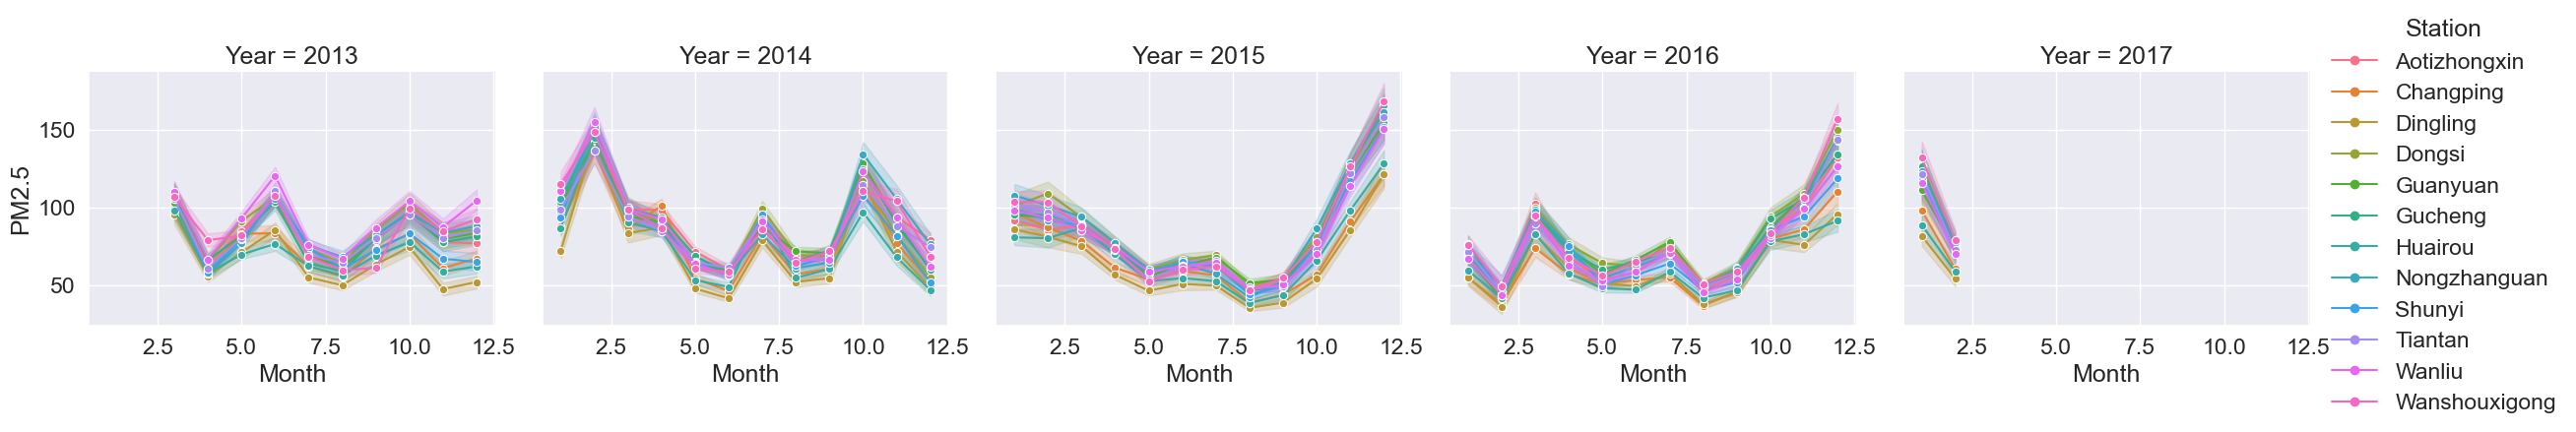

In [49]:
sns.relplot(x="Month", y="PM2.5", hue="Station", col="Year", 
            kind="line", data=df, height=4, aspect=1.2, marker='o')
plt.show()


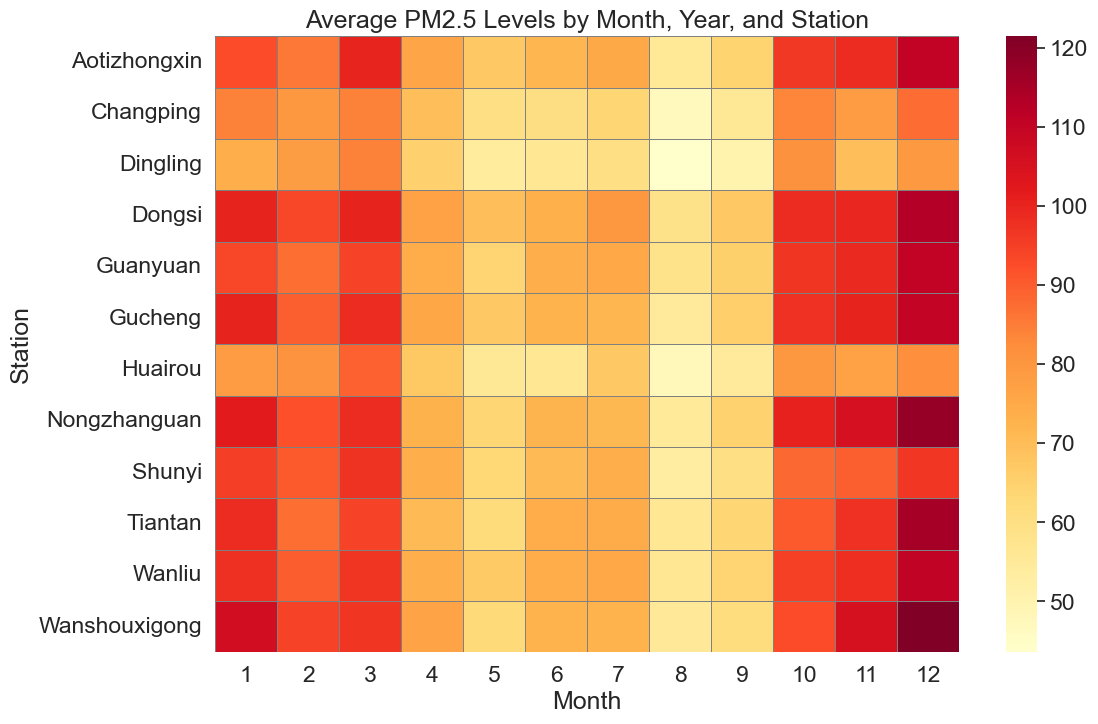

In [50]:
# Pivot data to create a matrix format for the heatmap
heatmap_data = df.pivot_table(values="PM2.5", index="Station", columns=["Month"], aggfunc="mean")

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlOrRd", linewidths=0.5, linecolor='gray')
plt.title("Average PM2.5 Levels by Month, Year, and Station")
plt.xlabel("Month")
plt.ylabel("Station")
plt.show()


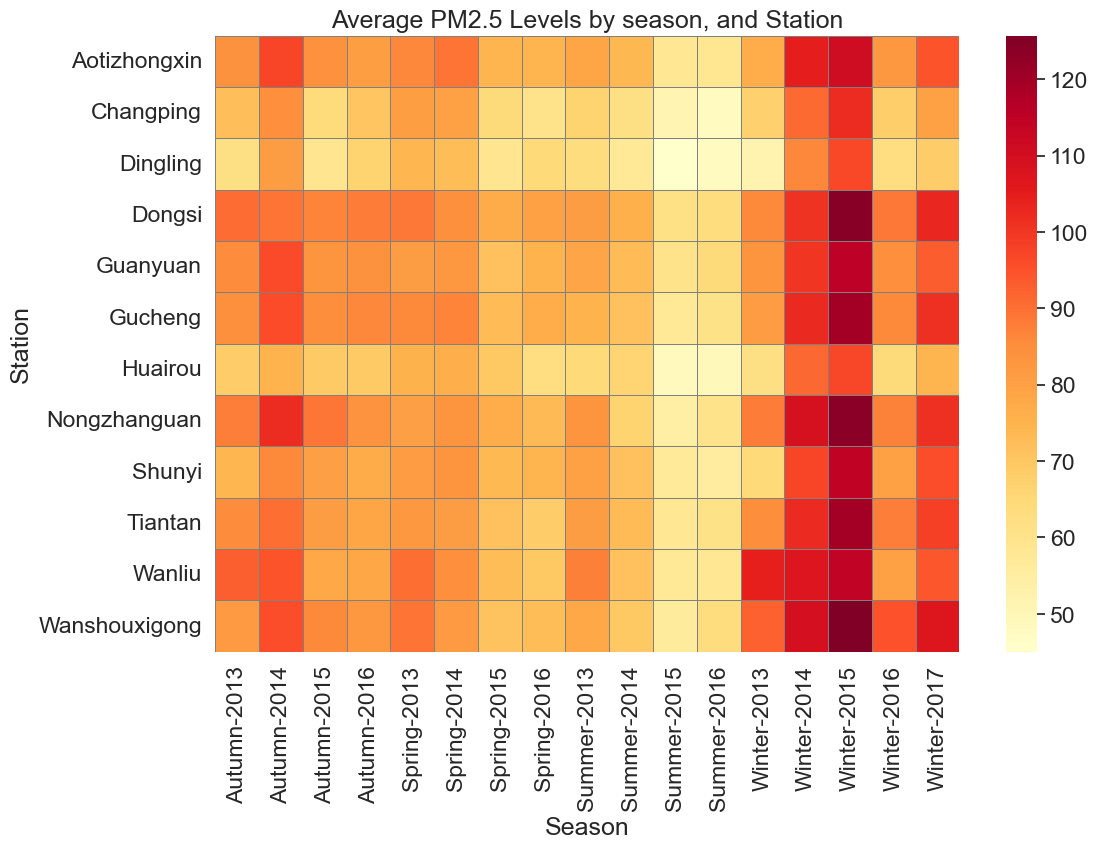

In [51]:
# Pivot data to create a matrix format for the heatmap
heatmap_data = df.pivot_table(values="PM2.5", index="Station", columns=['Season','Year'], aggfunc="mean")

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlOrRd", linewidths=0.5, linecolor='gray',)
plt.title("Average PM2.5 Levels by season, and Station")
plt.xlabel("Season")
plt.ylabel("Station")
plt.show()

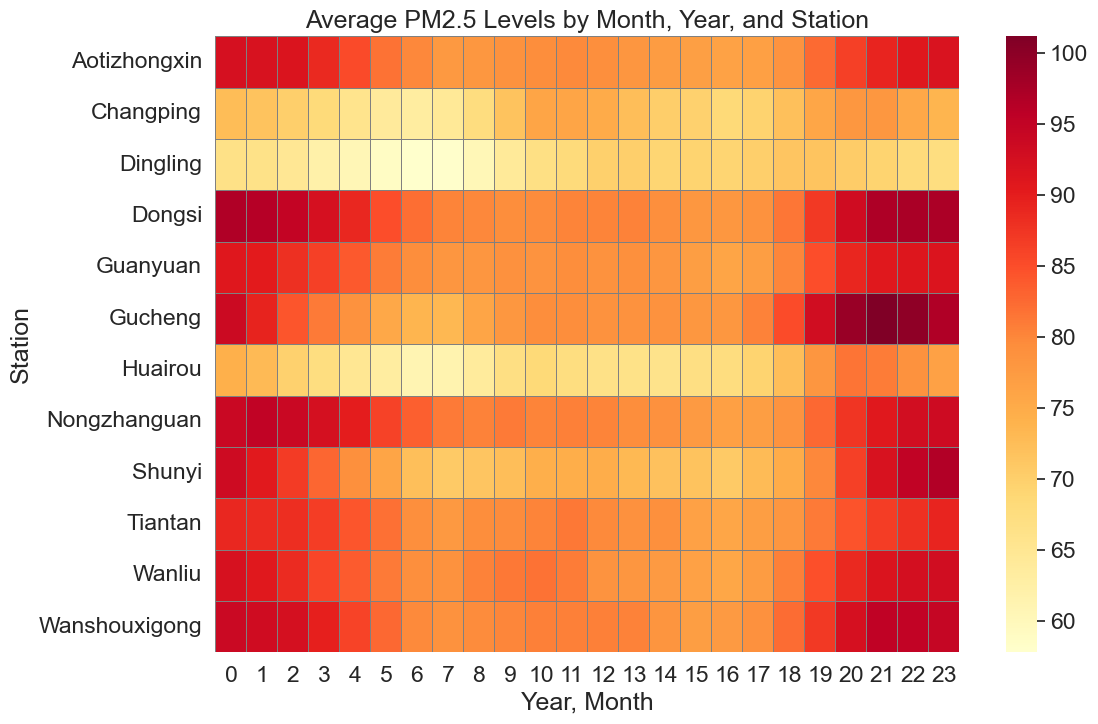

In [52]:
# Pivot data to create a matrix format for the heatmap
heatmap_data = df.pivot_table(values="PM2.5", index="Station", columns=["Hour"], aggfunc="mean")

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlOrRd", linewidths=0.5, linecolor='gray')
plt.title("Average PM2.5 Levels by Month, Year, and Station")
plt.xlabel("Year, Month")
plt.ylabel("Station")
plt.show()

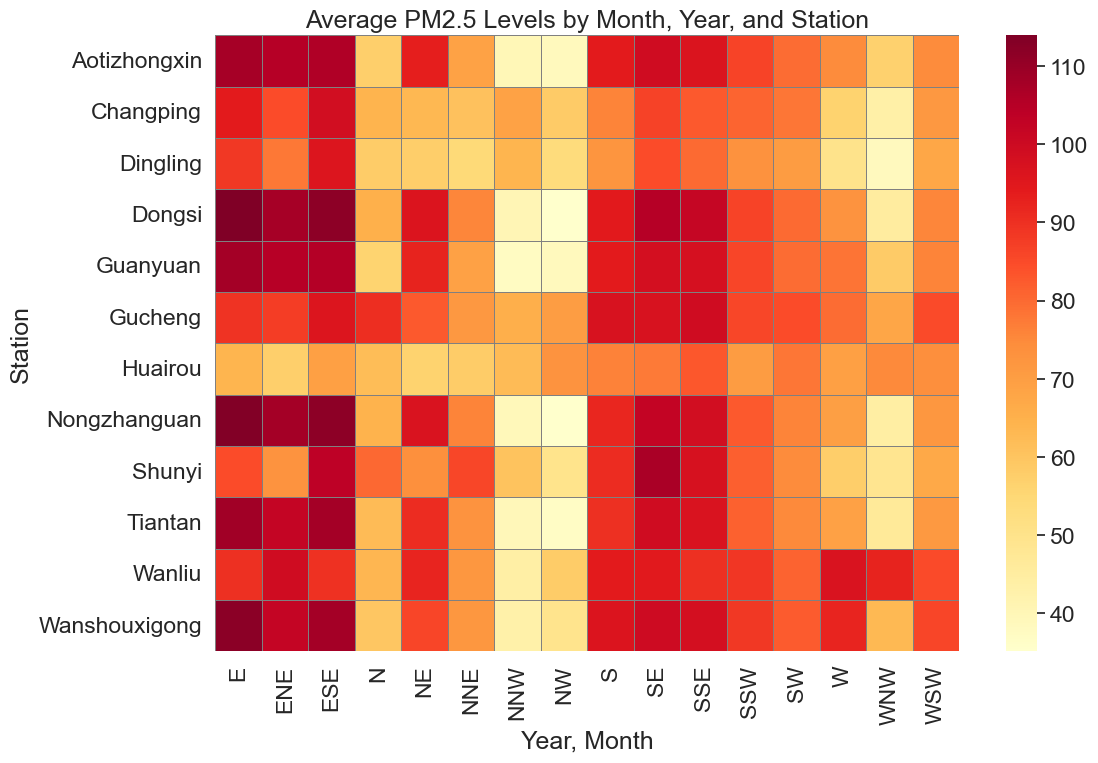

In [53]:
# Pivot data to create a matrix format for the heatmap
heatmap_data = df.pivot_table(values="PM2.5", index="Station", columns=["WinDir"], aggfunc="mean")

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlOrRd", linewidths=0.5, linecolor='gray')
plt.title("Average PM2.5 Levels by Month, Year, and Station")
plt.xlabel("Year, Month")
plt.ylabel("Station")
plt.show()

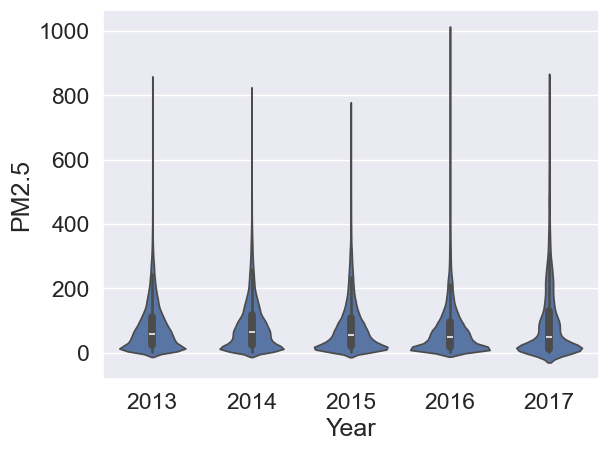

In [54]:
sns.violinplot(x="Year", y="PM2.5", data=df)
plt.show()

In [55]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#
#df['Station'] = le.fit_transform(df['Station'])
#df['AQI'] = le.fit_transform(df['AQI'])
#df['Season'] = le.fit_transform(df['Season'])
#df['WinDir'] = le.fit_transform(df['WinDir'])

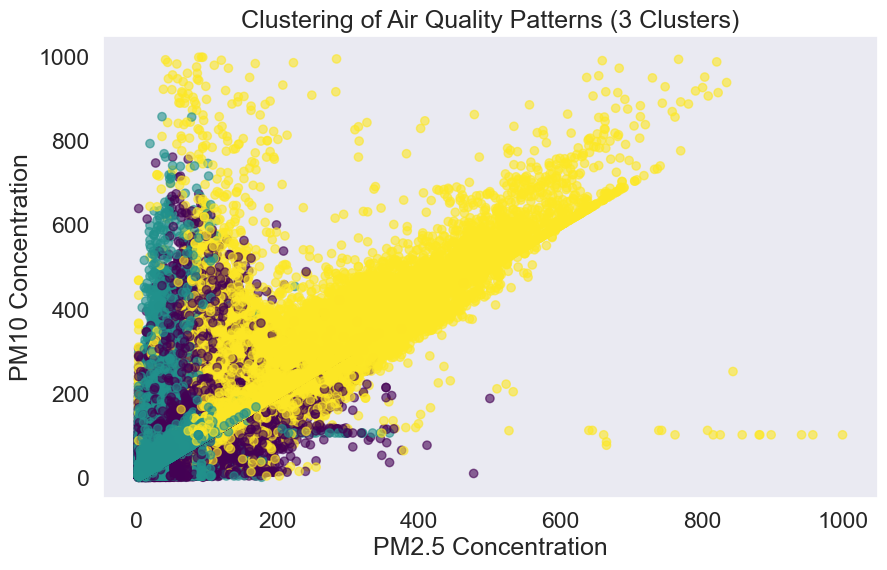

In [56]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting relevant features for clustering
features_for_clustering = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'DewP','Temp','Rain','WinSpeed']
df_clustering = df[features_for_clustering].dropna()

# Standardizing the features to ensure all have similar scales
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clustering)

# Applying K-Means clustering to the standardized data
kmeans = KMeans(n_clusters=3, random_state=42)
df_clustering['Cluster'] = kmeans.fit_predict(scaled_features)

# Plotting the clusters using PM2.5 and PM10 as example features
plt.figure(figsize=(10, 6))
plt.scatter(df_clustering['PM2.5'], df_clustering['PM10'], c=df_clustering['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('PM2.5 Concentration')
plt.ylabel('PM10 Concentration')
plt.title('Clustering of Air Quality Patterns (3 Clusters)')
plt.grid()
plt.show()


In [58]:
!pip install statsmodels


   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   -------- ------------------------------- 2.1/10.0 MB 14.7 MB/s eta 0:00:01
   ---------------- ----------------------- 4.2/10.0 MB 11.5 MB/s eta 0:00:01
   ------------------------- -------------- 6.3/10.0 MB 10.2 MB/s eta 0:00:01
   --------------------------------- ------ 8.4/10.0 MB 10.2 MB/s eta 0:00:01
   ---------------------------------------- 10.0/10.0 MB 10.2 MB/s eta 0:00:00


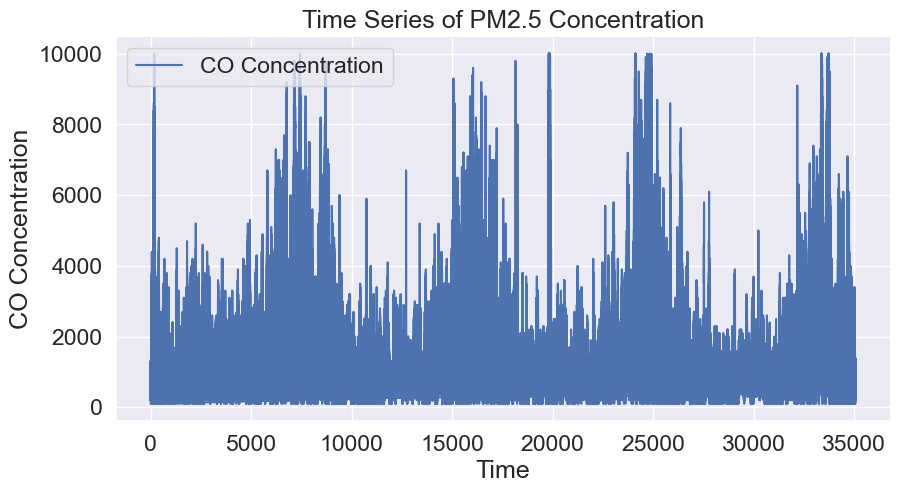

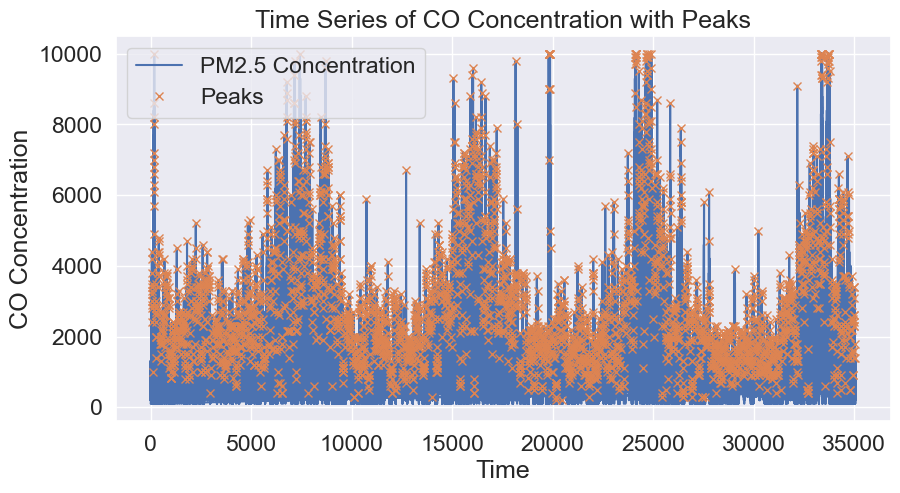

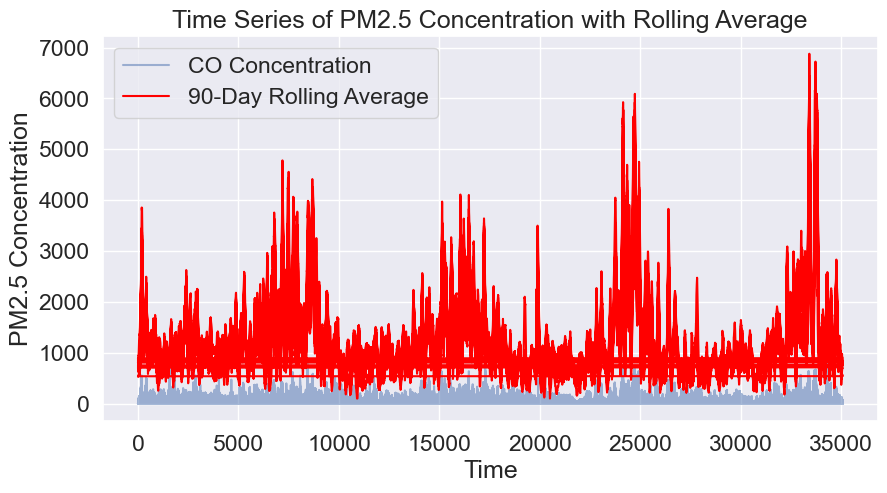

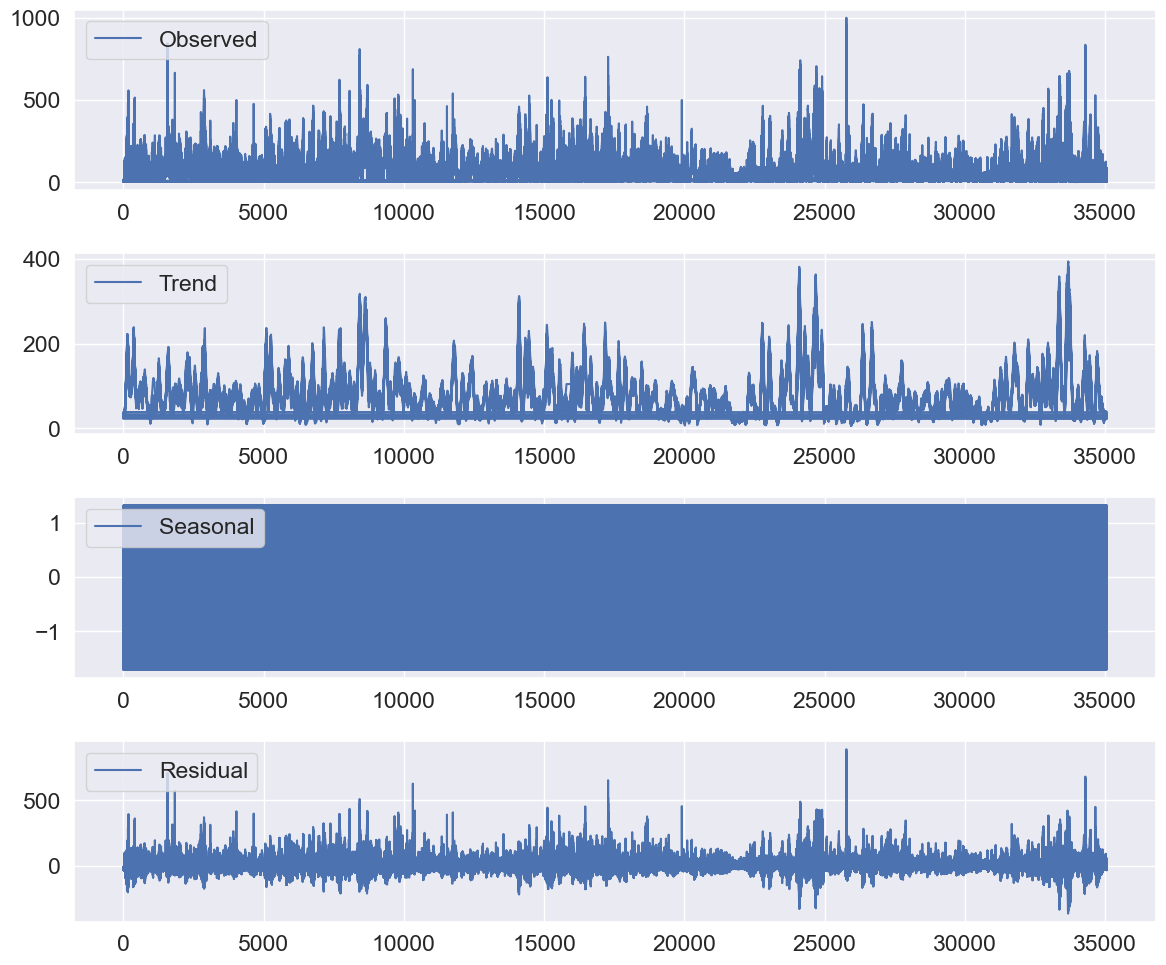

,Date,PM2.5 Peak Value
52,52,2799.000000
150,150,5700.000000
248,248,2600.000000
408,408,4099.000000
502,502,1899.000000
...,...,...
34560,34560,1900.000000
34683,34683,5400.000000
34806,34806,2000.000000
34950,34950,2500.000000


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from statsmodels.tsa.seasonal import seasonal_decompose

# Step 1: Load the Data
# Let's load one of the CSV files you provided. You can change the filename to analyze another dataset.
# Step 2: Visualize the Data
# Let's look at the PM2.5 concentration, assuming it represents the time series we are interested in.
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['CO'], label='CO Concentration')
plt.xlabel('Time')
plt.ylabel('CO Concentration')
plt.title('Time Series of PM2.5 Concentration')
plt.legend()
plt.show()

# Step 3: Identify Peaks and Trends
# Identify peaks in the PM2.5 concentration to understand any recurring spikes
peaks, _ = find_peaks(df['CO'].dropna(), distance=90)

# Plot the peaks on the original data
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['CO'], label='PM2.5 Concentration')
plt.plot(df.index[peaks], df['CO'].iloc[peaks], "x", label='Peaks')
plt.xlabel('Time')
plt.ylabel('CO Concentration')
plt.title('Time Series of CO Concentration with Peaks')
plt.legend()
plt.show()

# Step 4: Plot Rolling Average to Visualize Trends
# Calculate a rolling average to smooth the data and identify trends
rolling_window = 90  # Rolling window of 30 days
rolling_mean = df['CO'].rolling(window=rolling_window).mean()

# Plot the rolling average along with the original data
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['PM2.5'], label='CO Concentration', alpha=0.5)
plt.plot(df.index, rolling_mean, color='red', label=f'{rolling_window}-Day Rolling Average')
plt.xlabel('Time')
plt.ylabel('PM2.5 Concentration')
plt.title('Time Series of PM2.5 Concentration with Rolling Average')
plt.legend()
plt.show()

# Step 5: Perform Decomposition for Trend and Seasonality
# Decompose the time series to identify trend, seasonality, and residual components
decomposition = seasonal_decompose(df['PM2.5'].dropna(), model='additive', period=90)

# Plot the decomposed components
plt.figure(figsize=(12, 10))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Step 6: Display Peaks to User
df_peaks = pd.DataFrame({
    'Date': df.index[peaks],
    'PM2.5 Peak Value': df['CO'].iloc[peaks]
})

# Print the peaks dataframe
display(df_peaks)

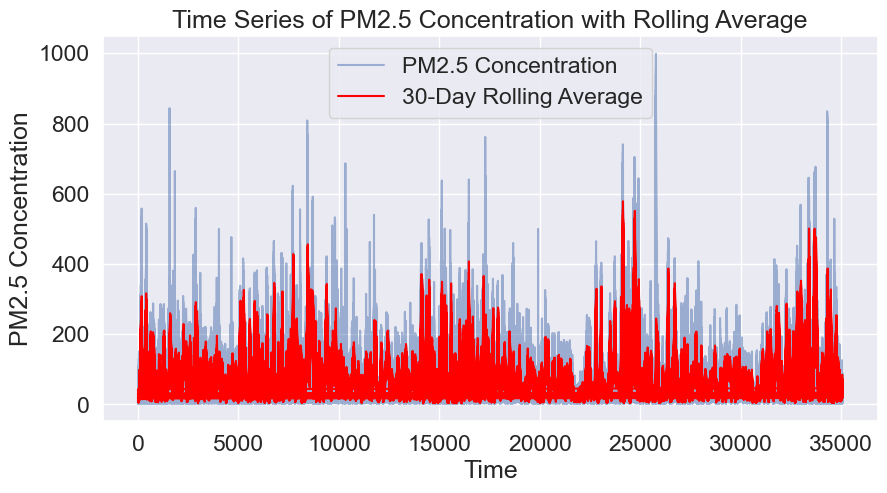

In [60]:

# Step 4: Plot Rolling Average to Visualize Trends
# Calculate a rolling average to smooth the data and identify trends
rolling_window = 30  # Rolling window of 30 days
rolling_mean = df['PM2.5'].rolling(window=rolling_window).mean()

# Plot the rolling average along with the original data
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['PM2.5'], label='PM2.5 Concentration', alpha=0.5)
plt.plot(df.index, rolling_mean, color='red', label=f'{rolling_window}-Day Rolling Average')
plt.xlabel('Time')
plt.ylabel('PM2.5 Concentration')
plt.title('Time Series of PM2.5 Concentration with Rolling Average')
plt.legend()
plt.show()


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os 
import random
%matplotlib inline 
sns.set(color_codes=True)
from sklearn import preprocessing
import glob
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
import statistics

In [62]:
# Set the directory path containing the CSV files
path = "C:/Users/alexa/OneDrive/ADS 3_1/Machine Learning/Project/Beijing Multi-Site Air Quality dataset/beijing+multi+site+air+quality+data/filled_data.csv"
data=pd.read_csv(path)

In [63]:
# Step 1: Combine year, month, day, and hour columns into a single datetime column
data['datetime'] = pd.to_datetime(data[['Year', 'Month', 'Day', 'Hour']])

In [64]:
# Step 2: Drop the original date columns and irrelevant columns ('No' and 'station')
data.drop(columns=['Year', 'Month', 'Day', 'Hour', 'Station','WinDir'], inplace=True)

# Step 3: Set 'datetime' as the index for time series compatibility
data.set_index('datetime', inplace=True)


In [65]:
# create input and output
X1 = data.drop('PM2.5', axis = 1)
y1 = data['PM2.5']

In [66]:
# for train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state=128)

# see train and test dataset shape
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (336614, 10)
y_train: (336614,)
X_test: (84154, 10)
y_test: (84154,)


In [67]:

# import libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# function that include all regression models
def allRegressors(X_train, X_test, y_train, y_test):
    Regressors = [LinearRegression(), RandomForestRegressor(), GradientBoostingRegressor(), 
                  KNeighborsRegressor(), DecisionTreeRegressor()]
    mae_dict = {}
    mae_scores = []
    rmse_dict = {}
    rmse_scores = []
    
    # function for mean absolute error
    def maeScore(regressor):
        """
        :param regressor: regressor model function
        :return: mean absolute error for regressor
        """
        
        clf = regressor.fit(X_train, y_train)
        pred = clf.predict(X_test)
        mae_score = mean_absolute_error(y_test, pred)
        return mae_score
    
    # function for root mean square error
    def rmseScore(regressor):
        """
        :param regressor: regressor model function
        :return: root mean score error for regressor
        """
        
        clf = regressor.fit(X_train, y_train)
        pred = clf.predict(X_test)
        rmse_score = np.sqrt(mean_squared_error(y_test, pred))
        return rmse_score
    
    # mean absolute error, root mean square error for each regressors
    for regressor in Regressors:
        name = regressor.__class__.__name__
        mae_dict[name] = maeScore(regressor)
        mae_scores.append(maeScore(regressor))
        rmse_dict[name] = rmseScore(regressor)
        rmse_scores.append(rmseScore(regressor))
        print("*************************************************************************")
        print(f"{name} Mean Absolute Error = {mae_dict[name]}")
        print(f"{name} Root Mean Square Error = {rmse_dict[name]}")
    
    
    #Plotting the performance of regressors
    def plotPerformance(scores_list, scores_dict, metric:str):
        """
        :param scores_list: list that include evaluation scores 
        :param scores_dict: dictionary that include regressors and evaluation scores
        :param metric: metric name y axis 
        :return: plot of performance comparison of regressors
        """
        
        N = len(Regressors)
        w = 0.5
        x = np.arange(N)
        plt.bar(x, scores_list, width = w, align = 'center', color="g")
        plt.xlabel("Regressors")
        plt.title("Performance Comparison of Regressors")
        plt.ylabel(f"{metric} Error")
        plt.xticks(x, scores_dict.keys(), rotation=90)
        plt.yticks(np.arange(0, np.max(scores_list), np.max(scores_list)/len(scores_list)))
        plt.show()

        # call the functions
    plotPerformance(mae_scores, mae_dict, "Mean Absolute")
    plotPerformance(rmse_scores, rmse_dict, "Root Mean Square")
    


*************************************************************************
LinearRegression Mean Absolute Error = 20.705918324949796
LinearRegression Root Mean Square Error = 32.069168769336926
*************************************************************************
RandomForestRegressor Mean Absolute Error = 12.341415424588268
RandomForestRegressor Root Mean Square Error = 20.940626783171965
*************************************************************************
GradientBoostingRegressor Mean Absolute Error = 16.234228759590273
GradientBoostingRegressor Root Mean Square Error = 25.862405138793942
*************************************************************************
KNeighborsRegressor Mean Absolute Error = 15.117557588587466
KNeighborsRegressor Root Mean Square Error = 25.44513099847388
*************************************************************************
DecisionTreeRegressor Mean Absolute Error = 16.831499839909792
DecisionTreeRegressor Root Mean Square Error = 29.82722518

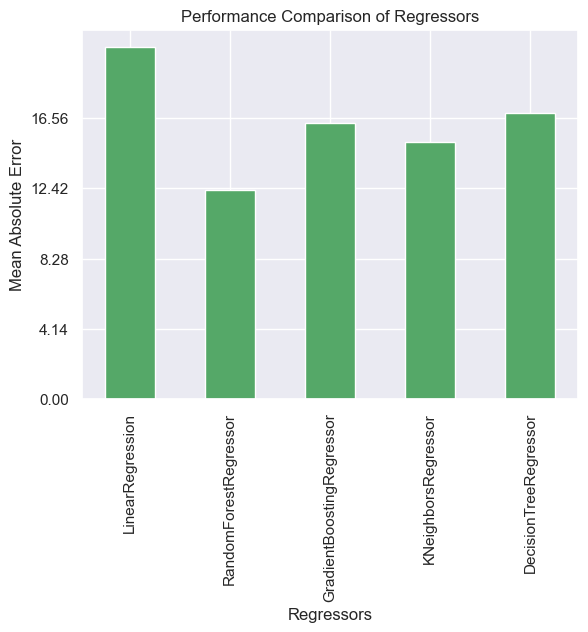

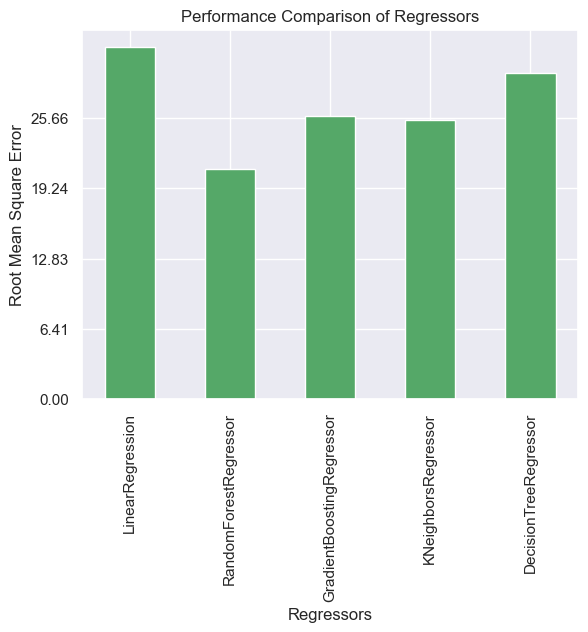

In [68]:
allRegressors(X_train, X_test, y_train, y_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Feature Engineering - Include previous pollutants and weather data as features
# Create lagged features to capture historical context
data['PM2.5_lag1'] = data['PM2.5'].shift(1)
data['PM2.5_lag2'] = data['PM2.5'].shift(2)
data['PM2.5_lag3'] = data['PM2.5'].shift(3)

# Dropping any rows with NaN values due to lagging
data_rf = data.dropna()

# Defining feature columns - pollutant and meteorological features along with lags
feature_columns = ['PM2.5_lag1', 'PM2.5_lag2', 'PM2.5_lag3', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'Temp', 'Press', 'DewP', 'Rain', 'WinSpeed']
X = data_rf[feature_columns]
y = data_rf['PM2.5']

# Step 2: Train-Test Split (80% train, 20% test split)
split_index = int(0.8 * len(X))
X_train_3, X_test_3 = X.iloc[:split_index], X.iloc[split_index:]
y_train_3, y_test_3 = y.iloc[:split_index], y.iloc[split_index:]

# Step 3: Train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_3, y_train_3)

# Step 4: Make predictions and evaluate
y_pred_3= rf_model.predict(X_test_3)
mae = mean_absolute_error(y_test_3, y_pred_3)
rmse = np.sqrt(mean_squared_error(y_test_3, y_pred_3))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

# Step 5: Plot Actual vs Predicted PM2.5 levels
plt.figure(figsize=(12, 6))
plt.plot(y_test_3.values, label='Actual PM2.5', color='blue', linewidth=1.5)
plt.plot(y_pred_3, label='Predicted PM2.5', color='red', linestyle='--', linewidth=1.5)
plt.title('Random Forest Regressor: Actual vs Predicted PM2.5 Levels')
plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define threshold for classification (Classification Threshold: PM2.5 > 75 is categorized as "High", and values ≤75 as "Low")
threshold = 75

# Convert the PM2.5 predictions and actual values into binary classes
y_test_class_3 = (y_test_3 > threshold).astype(int)  # Actual class labels
y_pred_class_3 = (y_pred_3> threshold).astype(int)  # Predicted class labels

# Generate the classification report
report = classification_report(y_test_class_3, y_pred_class_3, target_names=['Low PM2.5', 'High PM2.5'])
print("Classification Report:\n", report)

# Generate and plot the confusion matrix
conf_matrix = confusion_matrix(y_test_class_3, y_pred_class_3)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Low PM2.5', 'High PM2.5'], yticklabels=['Low PM2.5', 'High PM2.5'])
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix")
plt.show()

# To calculate accuracy for the Random Forest Regressor's classification results

accuracy = (y_test_class_3 == y_pred_class_3).mean()
print("Classification Accuracy:", accuracy)





In [ ]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error
import seaborn as sns

# Step 1: Normalize the data for better model performance
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3','Temp', 'Press', 'DewP', 'Rain', 'WinSpeed']])

# Step 2: Prepare the data for LSTM
# Define sequence length (e.g., using the last 24 hours to predict the next hour)
sequence_length = 24

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    X2, y2 = [], []
    for i in range(seq_length, len(data)):
        X2.append(data[i-seq_length:i, :])
        y2.append(data[i, 0])  # Target is PM2.5
    return np.array(X2), np.array(y2)

# Split the scaled data into training and testing sets (80-20 split)
train_size = int(0.8 * len(data_scaled))
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

# Create sequences for training and testing
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test_lstm = create_sequences(test_data, sequence_length)

# Step 3: Define the LSTM model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# Print the model summary
print(lstm_model.summary())

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Step 4: Train the LSTM model
history = lstm_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test_lstm), verbose=1)

# Make predictions
lstm_predictions = lstm_model.predict(X_test)

# Ensure the shape matches the original feature space
# Add the correct number of zero columns for inverse transformation
lstm_predictions_full = np.hstack((lstm_predictions, np.zeros((lstm_predictions.shape[0], X_train.shape[2] - 1))))
y_test_lstm_full = np.hstack((y_test_lstm.reshape(-1, 1), np.zeros((y_test_lstm.shape[0], X_train.shape[2] - 1))))

# Perform the inverse transformation on the full arrays
lstm_predictions_rescaled = scaler.inverse_transform(lstm_predictions_full)
y_test_lstm_rescaled = scaler.inverse_transform(y_test_lstm_full)

# Extract only the PM2.5 values for evaluation
lstm_predictions_pm25 = lstm_predictions_rescaled[:, 0]
y_test_pm25 = y_test_lstm_rescaled[:, 0]

# Step 6: Calculate MAE and RMSE
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_pm25, lstm_predictions_pm25)
print('Mean Absolute Error (MAE):', mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test_pm25, lstm_predictions_pm25))
print('Root Mean Squared Error (RMSE):', rmse)

# Plot training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='--', linewidth=2)
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.show()

# Plotting the actual vs predicted PM2.5 values for the first 100 samples in the test set
plt.figure(figsize=(12, 6))
plt.plot(y_test_pm25[:100], label='Actual PM2.5', color='blue')
plt.plot(lstm_predictions_pm25[:100], label='Predicted PM2.5', color='red', linestyle='--')
plt.xlabel('Samples')
plt.ylabel('PM2.5')
plt.title('LSTM Model short-term: Actual vs Predicted PM2.5 Levels')
plt.legend()
plt.show()

# Define classification threshold for PM2.5 levels
threshold = 75

# Convert the PM2.5 predictions and actual values into binary classes based on the threshold
y_test_class = (y_test_pm25 > threshold).astype(int)  # Actual class labels
y_pred_class = (lstm_predictions_pm25 > threshold).astype(int)  # Predicted class labels

# Generate the classification report
report = classification_report(y_test_class, y_pred_class, target_names=['Low PM2.5', 'High PM2.5'])
print("Classification Report:\n", report)

# Generate and plot the confusion matrix
conf_matrix = confusion_matrix(y_test_class, y_pred_class)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Low PM2.5', 'High PM2.5'], yticklabels=['Low PM2.5', 'High PM2.5'])
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix for LSTM Model short-term")
plt.show()


AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations